### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aerofitdata/aerofit_treadmill.csv


In [2]:
data_path = "/kaggle/input/aerofitdata/aerofit_treadmill.csv"
df = pd.read_csv(data_path)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Observations:

- There are no missing values in the data.
- There are 3 unique products in the dataset.
- **KP281** is the most frequent product.
- Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
- Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the female.
- Standard deviation for **Income** & **Miles** is very high. These variables might have the outliers in it.

In [149]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are 3 unique products available in the dataset.

## Univariate Analysis

#### Understanding the distribution of the data for the quantitative attributes:

1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

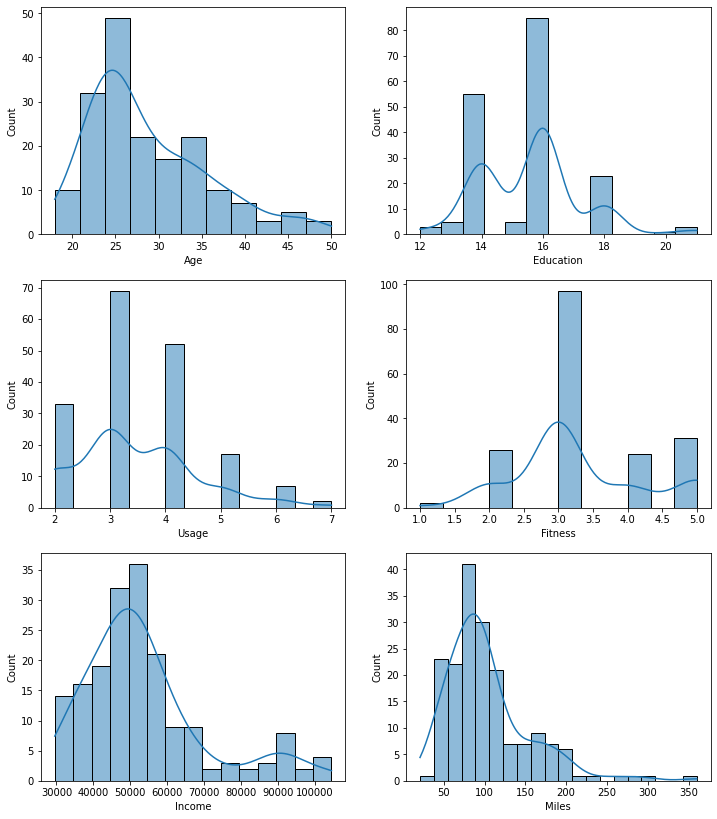

In [32]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

#### Outliers detection using BoxPlots

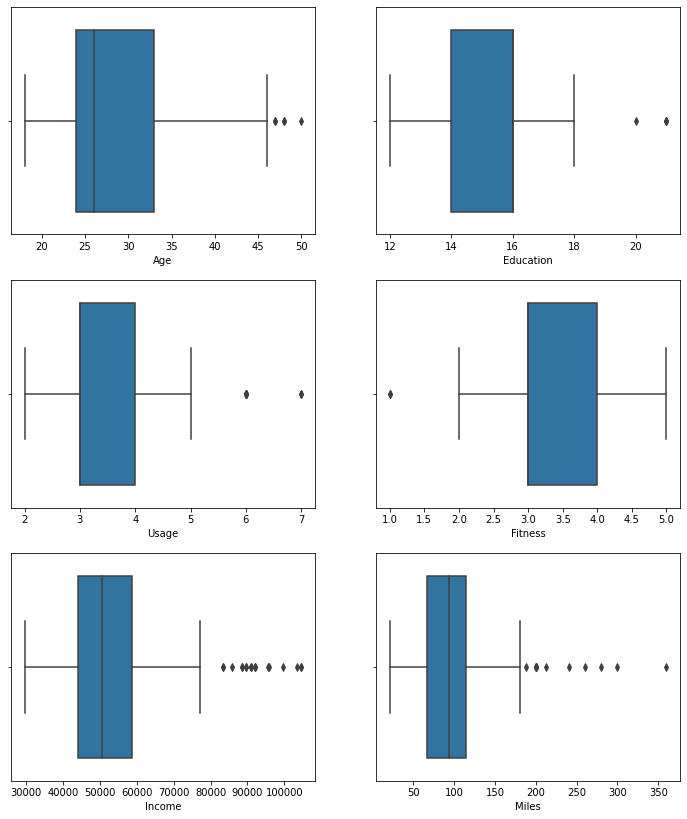

In [38]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Obervation

Even from the boxplots it is quite clear that:

- **Age**, **Education** and **Usage** are having very few outliers.
- While **Income** and **Miles** are having more outliers.

#### Understanding the distribution of the data for the qualitative attributes:

1. Product
2. Gender
3. MaritalStatus

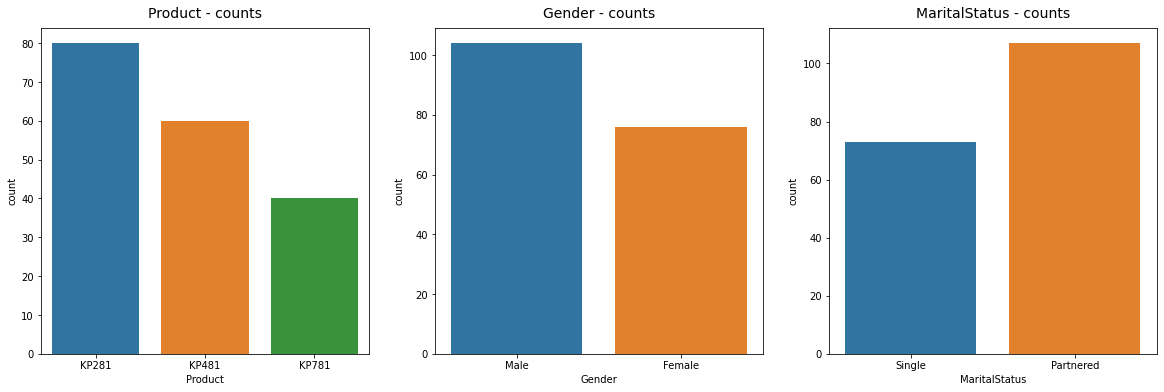

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

#### Obervations

- **KP281** is the most frequent product.
- Thare are more Males in the data than Females.
- More **Partnered** persons are there in the data.

To be precise - normalized count for each variable is shown below

In [87]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

#### Obervations
- **Product**
    - 44.44% of the customers have purchased **KP2821** product.
    - 33.33% of the customers have purchased **KP481** product.
    - 22.22% of the customers have purchased **KP781** product.
    
    
- **Gender**
    - 57.78% of the customers are **Male**.
    
    
- **MaritalStatus**
    - 59.44% of the customers are **Partnered**.

## Bivariate Analysis

#### Checking if features - `Gender` or `MaritalStatus` have any effect on the product purchased.

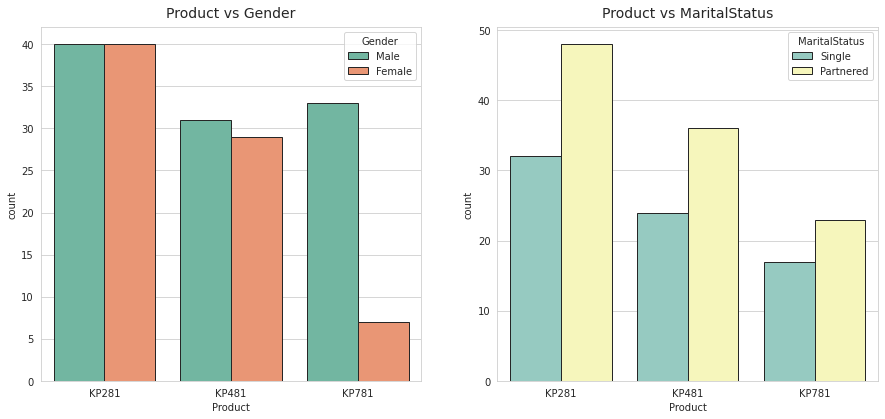

In [123]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

#### Obervations

- **`Product vs Gender`**
    - Equal number of males and females have purchased **KP281** product and Almost same for the product **KP481**
    - Most of the `Male` customers have purchased the **KP781** product.
    
    
- **`Product vs MaritalStatus`**
    - Customer who is `Partnered`, is more likely to purchase the product.

##### &emsp;Checking if following features have any effect on the product purchased:

1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

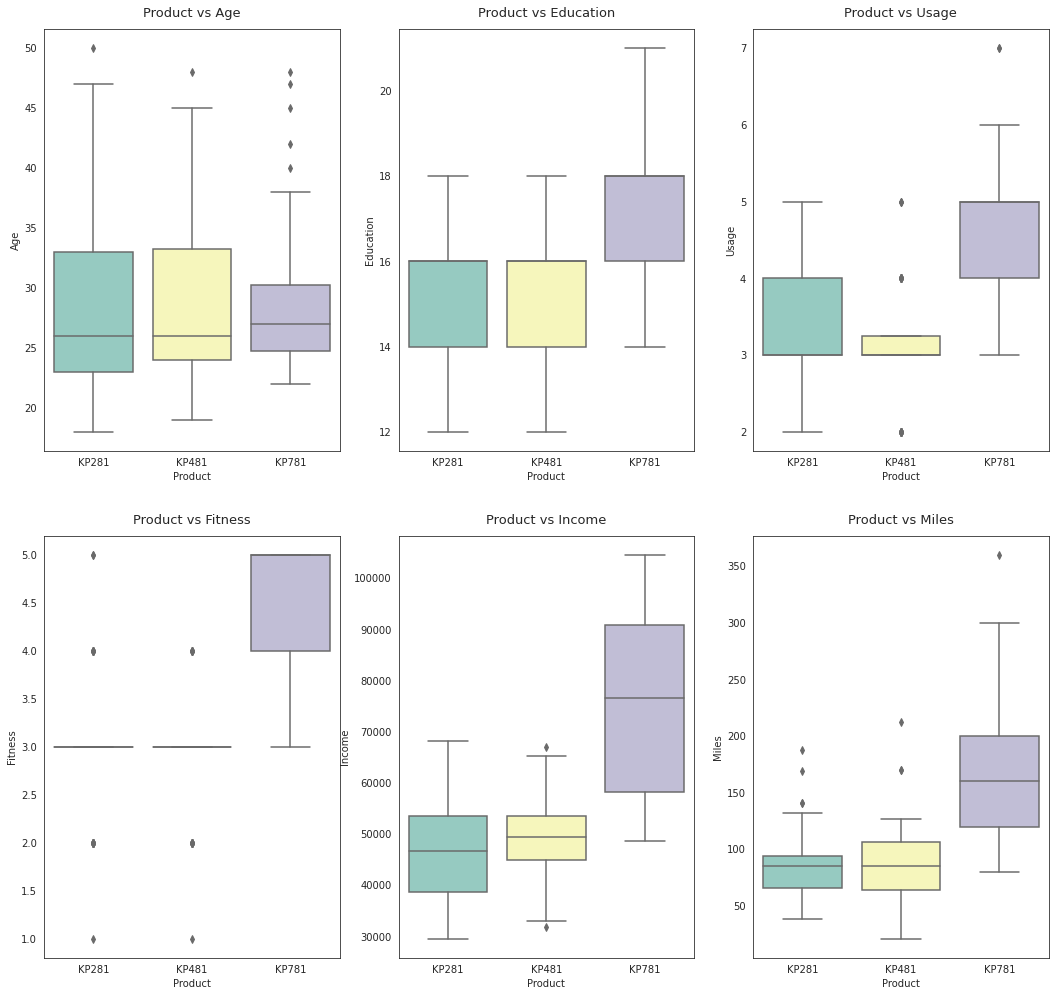

In [139]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

#### Observations

1. **`Product vs Age`**
    * Customers purchasing products `KP281 & KP481` are having same `Age` median value.
    * Customers whose age lies between 25-30, are more likely to buy `KP781` product


2. **`Product vs Education`**
    * Customers whose `Education` is greater than 16, have more chances to purchase the `KP781` product.
    * While the customers with `Education` less than 16 have equal chances of purchasing `KP281` or `KP481`.
    
    
3. **`Product vs Usage`**
    * Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the `KP781` product.
    * While the other customers are likely to purchasing `KP281` or `KP481`.
    

4. **`Product vs Fitness`**
    * The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the `KP781` product.
    

5. **`Product vs Income`**
    * Higher the `Income` of the customer (Income >= 60000), higher the chances of the customer to purchase the `KP781` product.
    

6. **`Product vs Miles`**
    * If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy `KP781` product.

### Multivariate Analysis

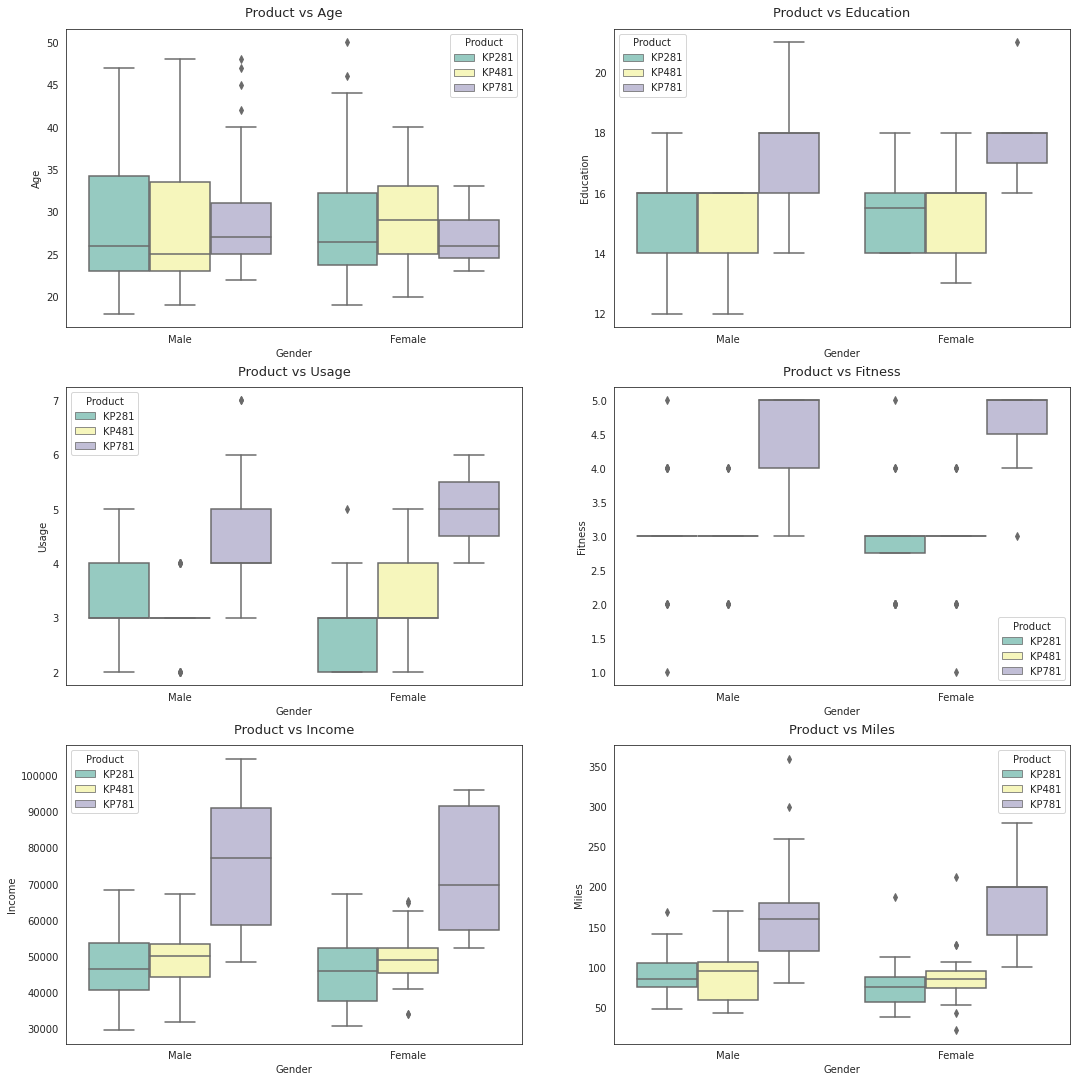

In [155]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

#### Obervations

- Females planning to use treadmill 3-4 times a week, are more likely to buy `KP481` product

### Computing Marginal & Conditional Probabilities

#### Marginal Probability

In [174]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

#### Conditional Probabilities

#### Probability of each product given gender

In [205]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



#### Probability of each product given MaritalStatus

In [206]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



In [208]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
